## Quotes segmentation/classification

In this notebook, we treat each quote of the corpus and assign them a score, or a binary variable determining if the quote is formal or informal according the dictionnary of informal formulation and slang vocabulary

In [2]:
#importing the required modules
import seaborn as sns
from IPython.display import display, HTML
import matplotlib.pyplot as plt
import scipy.stats as stats
import pandas as pd
import numpy as np
import seaborn as sns

# Small adjustments to default style of plots, making sure it's readable and colorblind-friendly everywhere
plt.style.use('seaborn-colorblind')
plt.rcParams.update({'font.size' : 12.5,
                     'figure.figsize':(10,7)})

Read the dictionnary of slang/informal words:

In [795]:
colloc_dict = pd.read_pickle('urban_dictionary.pkl')

In [656]:
%%time
#copy the path of the sample quotes: (to big to put in the git)
#ALEX: 'C:/Users/alexb/Documents/Ecole/EPFL/MasterII/ADA/'
#JULES: ...
#MARIN: ...
#NICO: ...


path_2_data = 'C:/Users/alexb/Documents/Ecole/EPFL/MasterII/ADA/'


#import the dataset sample
raw_data = pd.read_json(path_2_data + 'Sample_cleaned_1Mio.json.bz2',compression="bz2",lines=True)

raw_data.describe()

Wall time: 1min 23s


,numOccurrences,p1,p2,delta_p,year
count,668534.00000,668534.000000,668534.000000,668534.000000,668534.000000
mean,3.55898,0.818245,0.161096,0.657149,2017.536327
std,22.64603,0.095738,0.081709,0.173361,1.770882
min,1.00000,0.500100,0.008600,0.300000,2015.000000
25%,1.00000,0.747400,0.093400,0.521900,2016.000000
50%,1.00000,0.830100,0.152600,0.674900,2018.000000
75%,2.00000,0.897300,0.221900,0.802200,2019.000000
max,12086.00000,0.990800,0.350000,0.982100,2020.000000


In [796]:
#df1 = {
        #'slang':['different', 'Zealand']}
#df1 = pd.DataFrame(df1,columns=['slang'])
#df1['slang'] = (' ' + df1['slang'] + ' ')

#further cleaning
parenthesis = colloc_dict.word.str.contains(pat = ')', regex = False)
P_index = parenthesis[parenthesis].index

colloc_dict=colloc_dict.drop(P_index, inplace = False)
colloc_dict = colloc_dict.drop(2205, inplace = False)

p = colloc_dict.word.str.contains(pat = '|', regex = False)
p_index = p[p].index
colloc_dict=colloc_dict.drop(p_index, inplace = False)

p2 = colloc_dict.word.str.contains(pat = '+', regex = False)
p2_index = p2[p2].index
colloc_dict=colloc_dict.drop(p2_index, inplace = False)

p3 = colloc_dict.word.str.contains(pat = '???', regex = False)
p3_index = p3[p3].index
colloc_dict=colloc_dict.drop(p3_index, inplace = False)

p4 = colloc_dict.word.str.contains(pat = '*', regex = False)
p4_index = p4[p4].index
colloc_dict=colloc_dict.drop(p4_index, inplace = False)

In [929]:
colloc_dict_w_space['word'] = (' ' + colloc_dict['word'] + ' ')
colloc_dict_reduced = colloc_dict_w_space.word
colloc_dict_w_space

0                                                   Janky 
1                                                slumpin' 
2                                                yayeeyay 
3                                               hard-core 
4                                                  brutal 
                               ...                        
20278                                               Gemmy 
20279                                               gemmy 
20282                                              rockah 
20285                                               rocka 
word     0             Janky 
1          slumpin' 
2   ...
Name: word, Length: 16107, dtype: object

In [861]:
test_sample = raw_data[0:10000]

In [862]:
%%time
#mylist = df1.slang
mylist = colloc_dict_reduced
pattern = '|'.join(mylist)

test_sample['informal'] = test_sample.quotation.str.contains(pattern, case = False, regex = True)
test_sample['informal']*= 1
test_sample['matched_w'] = test_sample['quotation'].str.extract('('+'|'.join(mylist) + ')', expand=True)


<timed exec>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Wall time: 6.55 s


<timed exec>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [863]:
%time
detected_word = test_sample.groupby(['matched_w'])['matched_w'].count()
detected_word.sort_values(axis=0, ascending = False)

Wall time: 0 ns


matched_w
 the      1227
 a         939
 and       463
 that      432
 are       417
          ... 
 bear        1
 be'         1
 bank        1
 ball        1
 � s         1
Name: matched_w, Length: 640, dtype: int64

array([[<AxesSubplot:title={'center':'informal'}>]], dtype=object)

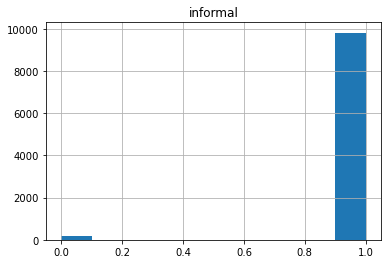

In [793]:
test_sample.hist(column='informal')

In [913]:
test_sample.informal.min()

0

In [916]:
test_sample.head()

,quoteID,quotation,speaker,qids,date,numOccurrences,probas,urls,phase,p1,p2,delta_p,year,informal,matched_w
0,2015-11-11-109291,They'll call me lots of different things. Libe...,Chris Christie,[Q63879],2015-11-11 00:55:12,1,"[[Chris Christie, 0.7395], [Bobby Jindal, 0.15...",[http://thehill.com/blogs/ballot-box/259760-ch...,E,0.7395,0.1505,0.5890,2015,1,not
1,2015-09-11-070666,It's kind of the same way it's been with the R...,Niklas Kronwall,[Q722939],2015-09-11 19:54:00,1,"[[Niklas Kronwall, 0.7119], [None, 0.2067], [H...",[http://redwings.nhl.com/club/news.htm?id=7787...,E,0.7119,0.2067,0.5052,2015,1,kind
2,2015-11-09-033345,I had a chuckle: They were showing a video of ...,Kris Draper,[Q948695],2015-11-09 00:57:45,3,"[[Kris Draper, 0.8782], [None, 0.1043], [Serge...",[http://ca.rd.yahoo.com/sports/rss/nfl/SIG=13u...,E,0.8782,0.1043,0.7739,2015,1,had
3,2015-09-05-038628,New Zealand will go in with a lot of confidenc...,John Eales,[Q926351],2015-09-05 02:40:10,3,"[[John Eales, 0.7896], [None, 0.2006], [Toutai...",[http://www.stuff.co.nz/sport/rugby/all-blacks...,E,0.7896,0.2006,0.5890,2015,1,in
4,2015-02-11-042325,In his suicide note he even made a joke thanki...,Pat Buckley,"[Q19956564, Q23006312, Q7143252, Q7143253]",2015-02-11 09:59:09,1,"[[Pat Buckley, 0.8816], [None, 0.1184]]",[http://independent.ie/life/health-wellbeing/m...,E,0.8816,0.1184,0.7632,2015,1,his


In [818]:
pattern

' Janky | slumpin\' | yayeeyay | hard-core | brutal | ho-bag | Hazy | hork | hecka | hella | wet wagons | twomp | ducket | mad | A-hole | Ass Kisser | clap | cob | Dry hump | No Shit | puke | folks | holla | dog | raunchy | ENERGY | Toss salid | cassette | no way | raw | 187 | flower run | tofu | rim job | connected | riiiiiiight | tiiight | o.g. | panty | tweeks coffee | flipside | issues | whooped | hippy | tra la la | gaff tape | Lyons | talent | bounce | mind control | skilz | the game | player | shag | sweet | real men | watchers | warn | check | velcro | peeps | mah | Lets get started, shall we? | dealio | fits | Young | grill | scrilla | chedda | bank | blood | Intensity | flirt | B.A.F | dissed | Disco | fantabulous | prophylactic | guh | piscicles | Yen | yea | nincompoop | googlie | Real Women | iced-out | heezi | wiggle | wthn | sexiled | h2h | school | harlot | skivvies | bj | zone | Fully Cooked | funkadelic | Yuppie Food Stamps | boujouix | wai | la | inhtsa | craptacular

In [822]:
mylist.sample(60)


10244                                        crusty-crack 
14888                                          Cosby Kids 
17101                                             methode 
6086                                        Pafuckinlease 
11558                                                yesh 
10091                                           nutburger 
17815                                  Beef Eating aka BE 
950                                             president 
4401                                                grody 
5172                                                bacne 
18463                                               Nebby 
3415                                                 herb 
12740                              ugly duckling syndrome 
14392                                              Row-ho 
6860                                                 dibs 
15664                                          jock strap 
3677                                                 spa

In [936]:
test = {
        'word':['on the way home','hallo','with my cat', 'coucou']}
df_test = pd.DataFrame(test,columns=['word'])
df_test
df_test_space['word'] = (' ' + df_test['word'] + ' ')

In [937]:
test2 = {
        'quotation':['The happy me','on the way home','with the crowd','banana','hallo']}
df_test2 = pd.DataFrame(test2,columns=['quotation'])

In [938]:
mylist2 = df_test_space.word
pattern2 = '|'.join(mylist2)

In [939]:
df_test2['informal'] = df_test2.quotation.str.contains(pattern2, case = False, regex = True)
df_test2['informal']*= 1
df_test2['matched_w'] = df_test2['quotation'].str.extract('('+'|'.join(mylist2) + ')', expand=True)

In [940]:
df_test2

,quotation,informal,matched_w
0,The happy me,0,NaN
1,on the way home,0,NaN
2,with the crowd,0,NaN
3,banana,0,NaN
4,hallo,0,NaN


In [941]:
pattern2

' on the way home | hallo | with my cat | coucou '